In [21]:
import sklearn
import tensorflow as tf
import tensorflow as keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
       

No GPU was detected. CNNs can be very slow without a GPU.


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import os
import sys
assert sys.version_info >=(3,5)


In [5]:
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH  =os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id,tight_layout =True,fig_extension="png",resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id+ "."+ fig_extension)
    print("Saving figure",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format= fig_extension,dpi=resolution)

In [6]:
def plot_image(image):
    plt.imshow(image,cmap="gray",interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image,interpolation="nearset")
    plt.axis("off")

In [9]:
from sklearn.datasets import load_sample_image
import numpy as np

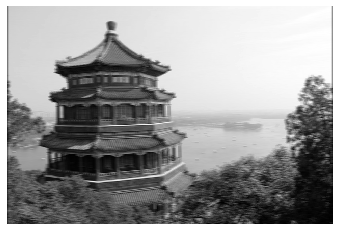

In [10]:
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china,flower])
batch_size, height, width, channels = images.shape
filters = np.zeros(shape=(7,7,channels,2),dtype = np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1
outputs = tf.nn.conv2d(images,filters, strides = 1,padding="SAME")

plt.imshow(outputs[0,:,:,1],cmap="gray")
plt.axis("off")
plt.show()

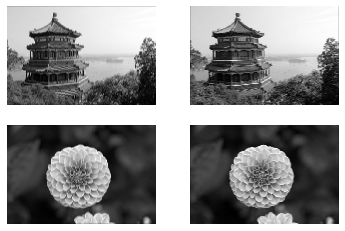

In [11]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plt.subplot(2,2,image_index*2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])
plt.show()

In [12]:
def crop(images):
    return images[150:220, 130:250]

Saving figure china_original


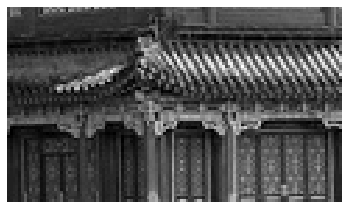

Saving figure china_vertical


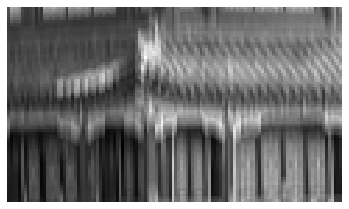

Saving figure china_horizontal


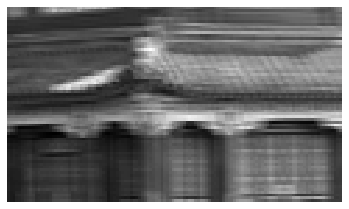

In [13]:
plot_image(crop(images[0,:,:,0]))
save_fig("china_original",tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical","china_horizontal"]):
    plot_image(crop(outputs[0,:,:,feature_map_index]))
    save_fig(filename,tight_layout=False)
    plt.show()

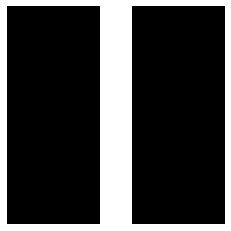

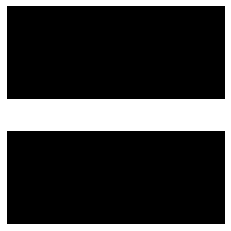

In [15]:
plot_image(filters[:,:,0,0])
plt.show()
plot_image(filters[:,:,0,1])
plt.show()

# Convolutional Layer

In [22]:
conv = keras.layers.Conv2D(filters=32,kernal_size=3,strides=1,padding="SAME",activation="relu")
plot_image(crop(outputs[0,:,:,0]))
plt.show()

AttributeError: module 'tensorflow' has no attribute 'layers'